✅ Dataset loaded successfully! Rows: 1296675
✅ Using sample rows: 129668

✅ Model training complete!

=== Model Performance ===
Accuracy: 99.4 %

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     25779
           1       0.00      0.00      0.00       155

    accuracy                           0.99     25934
   macro avg       0.50      0.50      0.50     25934
weighted avg       0.99      0.99      0.99     25934



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


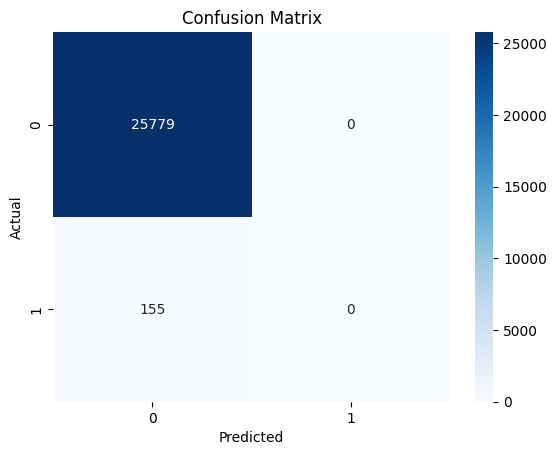


=== Single Transaction Check ===
Prediction: Legitimate ✅
Reason: Normal behaviour

✅ Results saved to fraud_predictions.csv


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [7]:
# ==========================================================
# CODSOFT – TASK 2 : Credit-Card Fraud Detection
# Project : XAI-Lite – Explainable Credit-Card Fraud Detection
# Author  : <your name here>
# ==========================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- 1. Load Dataset ----------
data = pd.read_csv("fraudTrain.csv")
print("✅ Dataset loaded successfully! Rows:", data.shape[0])

# ---------- 2. Clean Data ----------
data = data.dropna()                          # remove missing values
le = LabelEncoder()
for col in ['gender','category']:
    data[col] = le.fit_transform(data[col])

# drop non-numeric columns
drop_cols = ['trans_date_trans_time','merchant','first','last','street',
             'city','state','job','dob']
data = data.drop(columns=drop_cols, errors='ignore')

# keep numeric only
data = data.select_dtypes(include=[np.number])

X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

# ---------- 3. Sample to speed up ----------
# Take only 10% of data for faster training (balances speed vs accuracy)
data_sample = data.sample(frac=0.1, random_state=42)
X = data_sample.drop('is_fraud', axis=1)
y = data_sample['is_fraud']

print("✅ Using sample rows:", X.shape[0])

# ---------- 4. Split Data ----------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# ---------- 5. Train Model (Fast Option) ----------
# RandomForest is slower – we’ll use LogisticRegression for speed.
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("\n✅ Model training complete!")

# ---------- 6. Evaluate ----------
y_pred = model.predict(X_test)

print("\n=== Model Performance ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---------- 7. Explainability ----------
def explain_transaction(tx):
    reasons = []
    if tx['amt'] > 500:
        reasons.append("Amount unusually high")
    if tx['city_pop'] > 1_000_000:
        reasons.append("Large-city transaction")
    if tx['category'] == 1:
        reasons.append("High-risk merchant category")
    if not reasons:
        reasons.append("Normal behaviour")
    return ", ".join(reasons)

# ---------- 8. Single-Transaction Prediction ----------
sample = X_test.iloc[10]
pred = model.predict([sample])[0]
print("\n=== Single Transaction Check ===")
print("Prediction:", "Fraud ⚠️" if pred else "Legitimate ✅")
print("Reason:", explain_transaction(sample))

# ---------- 9. Save Results ----------
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
output.to_csv("fraud_predictions.csv", index=False)
print("\n✅ Results saved to fraud_predictions.csv")

# ==========================================================
# End of File
# ==========================================================
